# Insurance-Claim-Prediction on SBI LIFE Insurance Data set

This is "Sample Insurance Claim Prediction Dataset" which based on "[Medical Cost Personal Datasets][1]" to update sample value on top.

Feature Details:-
    
age : age of policyholder 
    
sex: gender of policy holder (female=0, male=1)
    
bmi:Body mass index, providing an understanding of body, weights that are relatively high or low relative to height, 
    objective index of  body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 25
    
steps:average walking steps per day of policyholder
    
children:number of children / dependents of policyholder 
    
smoker:smoking state of policyholder (non-smoke=0;smoker=1)

region:the residential area of policyholder in the US (northeast=0, northwest=1, southeast=2, southwest=3) 
    
charges: individual medical costs billed by health insurance

insuranceclaim:yes=1, no=0


# Importing The Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Importing the Dataset

In [2]:
data=pd.read_csv('SBI_Life_insurance.csv')
data.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


# Checking the shape of the dataset

In [4]:
data.shape

(1338, 8)

# Checking the type of the features 

In [5]:
data.dtypes

age                 int64
sex                 int64
bmi               float64
children            int64
smoker              int64
region              int64
charges           float64
insuranceclaim      int64
dtype: object

# Counting the values as per the class_label

In [6]:
data['insuranceclaim'].value_counts()

1    783
0    555
Name: insuranceclaim, dtype: int64

# Null Value Analysis

In [7]:
data.isnull().sum()

age               0
sex               0
bmi               0
children          0
smoker            0
region            0
charges           0
insuranceclaim    0
dtype: int64

we do not find any null values

# Familiarisation with Data

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 8 columns):
age               1338 non-null int64
sex               1338 non-null int64
bmi               1338 non-null float64
children          1338 non-null int64
smoker            1338 non-null int64
region            1338 non-null int64
charges           1338 non-null float64
insuranceclaim    1338 non-null int64
dtypes: float64(2), int64(6)
memory usage: 83.8 KB


In [9]:
data.describe()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.505232,30.663397,1.094918,0.204783,1.515695,13270.422265,0.585202
std,14.049960,0.500160,6.098187,1.205493,0.403694,1.104885,12110.011237,0.492871
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,1121.873900,0.000000
25%,27.000000,0.000000,26.296250,0.000000,0.000000,1.000000,4740.287150,0.000000
50%,39.000000,1.000000,30.400000,1.000000,0.000000,2.000000,9382.033000,1.000000
75%,51.000000,1.000000,34.693750,2.000000,0.000000,2.000000,16639.912515,1.000000
max,64.000000,1.000000,53.130000,5.000000,1.000000,3.000000,63770.428010,1.000000


# Skewness Analysis

In [3]:
data.skew()

age               0.055673
sex              -0.020951
bmi               0.284047
children          0.938380
smoker            1.464766
region           -0.038101
charges           1.515880
insuranceclaim   -0.346254
dtype: float64

In [4]:
for col in data.columns:
    if data.skew().loc[col]>0.55:
        data[col]=np.log1p(data[col])

Here in this section skewness is analysed and skewness  in some features is treated in this section using log transformation . We will also be using scaling technique to remove the skewness in this project.

In [5]:
data.skew()

age               0.055673
sex              -0.020951
bmi               0.284047
children          0.264083
smoker            1.464766
region           -0.038101
charges          -0.089817
insuranceclaim   -0.346254
dtype: float64

# Checking for the Outliers

age                   AxesSubplot(0.125,0.71587;0.168478x0.16413)
sex                AxesSubplot(0.327174,0.71587;0.168478x0.16413)
bmi                AxesSubplot(0.529348,0.71587;0.168478x0.16413)
children           AxesSubplot(0.731522,0.71587;0.168478x0.16413)
smoker               AxesSubplot(0.125,0.518913;0.168478x0.16413)
region            AxesSubplot(0.327174,0.518913;0.168478x0.16413)
charges           AxesSubplot(0.529348,0.518913;0.168478x0.16413)
insuranceclaim    AxesSubplot(0.731522,0.518913;0.168478x0.16413)
dtype: object

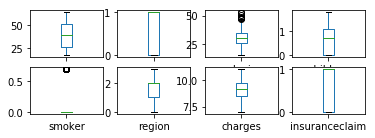

In [13]:
data.plot(kind='box',subplots=True , layout=(4,4))

# CorRelation Matrix
A correlation matrix is a table showing correlation coefficients between variables. Each cell in the table shows the correlation between two variables. A correlation matrix is used to summarize data, as an input into a more advanced analysis, and as a diagnostic for advanced analyses.

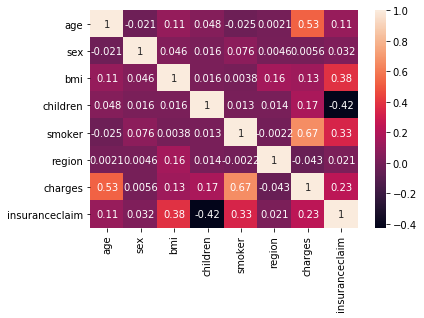

In [14]:
corr_df=data.corr()
sns.heatmap(corr_df,annot=True)

The collinearity between children and insurance claim is very less , therefore children features could be dropped for the better performance of the model

# Performing Univariate Analysis

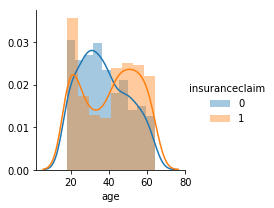

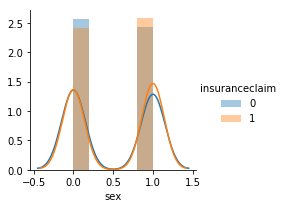

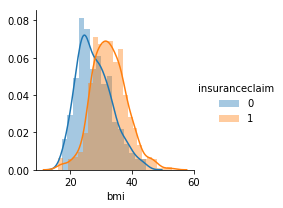

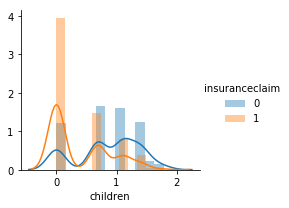

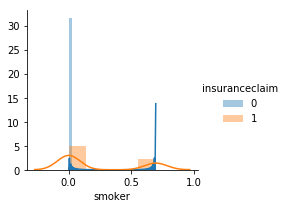

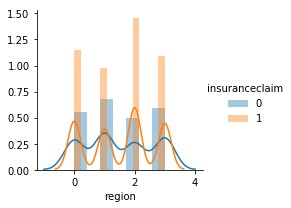

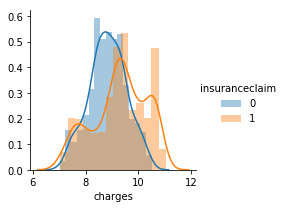

In [15]:
import warnings
warnings.filterwarnings("ignore")
columns=list(data.columns[:-1])
for val in columns:
#Plotting Probablity Density Function Curve for the columns : -
    sns.FacetGrid(data,hue="insuranceclaim",size=3)\
    .map(sns.distplot,val)\
    .add_legend()
    plt.show()

# Performing Bivariate Analysis

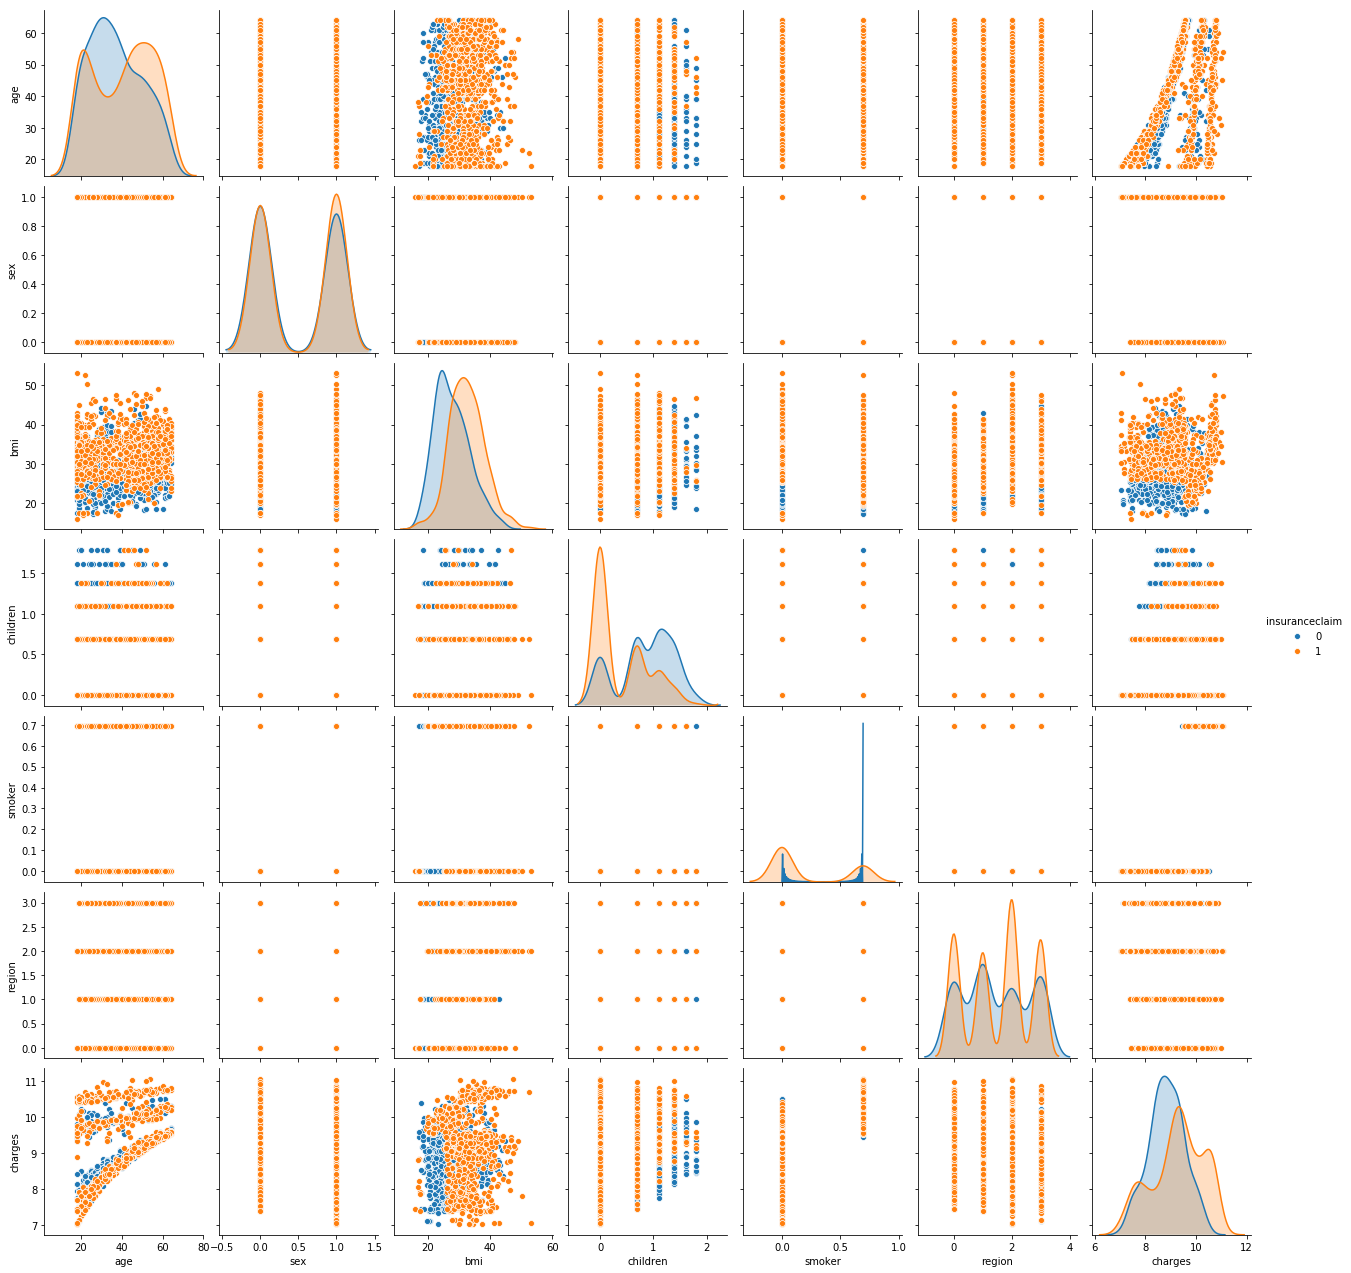

In [18]:
sns.pairplot(data , hue='insuranceclaim')

# Outliers Removal Using Zscore

In [6]:
from  scipy.stats import zscore
zs=np.abs(zscore(data))
zx=pd.DataFrame(zs)
zx

,0,1,2,3,4,5,6,7
0,1.438764,1.010519,0.453320,1.042346,1.970587,1.343905,0.691385,0.841910
1,1.509965,0.989591,0.509621,0.199594,0.507463,0.438495,1.789861,0.841910
2,0.797954,0.989591,0.383307,1.441534,0.507463,0.438495,0.759562,1.187776
3,0.441948,0.989591,1.305531,1.042346,0.507463,0.466915,0.978536,1.187776
4,0.513149,0.989591,0.292556,1.042346,0.507463,0.466915,0.912231,0.841910
...,...,...,...,...,...,...,...,...
1333,0.768473,0.989591,0.050297,1.441534,0.507463,0.466915,0.184897,1.187776
1334,1.509965,1.010519,0.206139,1.042346,0.507463,1.372326,1.522735,0.841910
1335,1.509965,1.010519,1.014878,1.042346,0.507463,0.438495,1.851921,0.841910
1336,1.296362,1.010519,0.797813,1.042346,0.507463,1.343905,1.625033,1.187776


In [7]:
df=data[(zs<3).all(axis=1)]
print('shape of the data with outliers  ' ,data.shape)
print('shape of the data without  outliers  ' ,df.shape)

shape of the data with outliers   (1338, 8)
shape of the data without  outliers   (1334, 8)


In this section we have treated the outliers with the help of ZSCORE using threshold value as 3 ,The features which are having the zscore value > 3 are treated as outliers and have been removed.

This data is not having any significant outliers therefore the shape of the new data is not changed

In [8]:
df.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0.000000,0.693147,3,9.734236,1
1,18,1,33.770,0.693147,0.000000,2,7.453882,1
2,28,1,33.000,1.386294,0.000000,2,8.400763,0
3,33,1,22.705,0.000000,0.000000,1,9.998137,0
4,32,1,28.880,0.000000,0.000000,1,8.260455,1


# Comparing the boxplots before/after outliers removal

*******box plots before outliers removal*******


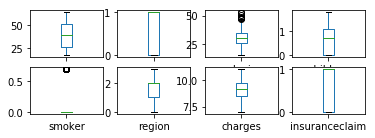

*******box plots after outliers removal*******


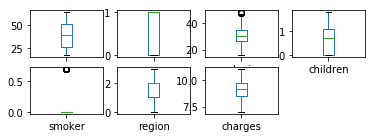

In [23]:
print('*******box plots before outliers removal*******')
data.plot(kind='box',subplots=True , layout=(4,4))
plt.show()
print('*******box plots after outliers removal*******')
x.plot(kind='box',subplots=True , layout=(4,4))
plt.show()

# separating the input Variable from the data set

In [9]:
x=df.iloc[:,:-1]
x

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0.000000,0.693147,3,9.734236
1,18,1,33.770,0.693147,0.000000,2,7.453882
2,28,1,33.000,1.386294,0.000000,2,8.400763
3,33,1,22.705,0.000000,0.000000,1,9.998137
4,32,1,28.880,0.000000,0.000000,1,8.260455
...,...,...,...,...,...,...,...
1333,50,1,30.970,1.386294,0.000000,1,9.268755
1334,18,0,31.920,0.000000,0.000000,0,7.699381
1335,18,0,36.850,0.000000,0.000000,2,7.396847
1336,21,0,25.800,0.000000,0.000000,3,7.605365


# separating the class Variable from the data set

In [10]:
y=df.iloc[:,-1]
y=np.array(y)
#x['Bmisquare'] = x['bmi']**2
x.drop(['children'],axis=1,inplace=True)
''''Dropping children column as it is contributing very less to the class insuranceclaim , dropping this column will help us to
increase the performance'''

"'Dropping children column as it is contributing very less to the class insuranceclaim , dropping this column will help us to\nincrease the performance"

In [25]:
x.head(5)

,age,sex,bmi,smoker,region,charges
0,19,0,27.900,0.693147,3,9.734236
1,18,1,33.770,0.000000,2,7.453882
2,28,1,33.000,0.000000,2,8.400763
3,33,1,22.705,0.000000,1,9.998137
4,32,1,28.880,0.000000,1,8.260455


# Standardasing the input matrix

In [11]:
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
x=scale.fit_transform(x)
x=np.array(x)


# Applying Various Classification Models
In this section we will be applying several classification models and hence we will be checking following performance matrix :

1) Accuracy score

2) AUC Score

3) Mean of crossing validation score using accuracy as scoring

4) Std Deviation of crossing validation score using accuracy as scoring

5) Confusion Matrix

We have also used GridSearch for tuning the parameters

Importing all the required library

importing the  models and performance matrix for the classification

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')

Building a function to find the maximum accuracy corresponding to the random state

In [13]:
def accur_at_rstate(model,x,y):
    random_state=np.arange(42,101)
    accuracy=0
    for r_state in random_state:
        train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.3,random_state=r_state)
        #DT=DecisionTreeClassifier()
        model.fit(train_x,train_y)
        pred = model.predict(test_x)
        #print('The accuracy for the {} is {}'.format(r_state,accuracy_score(test_y,pred_DT)))
        if accuracy_score(test_y,pred) > accuracy:
            accuracy=accuracy_score(test_y,pred)
            Final_r_state=r_state
        #Calculating 
    print('The maximum accuracy reached is {} at random state {}' .format(accuracy,Final_r_state))
    return Final_r_state
    

# Building a function to find the AUC Score and Confusion matrix

In [14]:
from sklearn import metrics
from sklearn.metrics import roc_auc_score
def roc_curve(model,r_state):
    train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.3,random_state=r_state)
    fpr_tr,tpr_tr,threshold = metrics.roc_curve(train_y,model.predict_proba(train_x)[:,1])
    fpr_test,tpr_test,threshold = metrics.roc_curve(test_y,model.predict_proba(test_x)[:,1])
    plt.plot(fpr_tr,tpr_tr ,label="train AUC ="+str(metrics.auc(fpr_tr,tpr_tr)))
    plt.plot(fpr_test,tpr_test ,label="test AUC ="+str(metrics.auc(fpr_test,tpr_test)))
    plt.title('ROC curve')
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.legend()
    plt.show()
    pred=model.predict(test_x)
    sns.heatmap(confusion_matrix(test_y,pred),annot=True)
    

# Performing DecisionTreeClassifier

In [30]:
from sklearn.model_selection import GridSearchCV
#max_depth = np.arange(30)
depth={'max_depth':range(1,30)}
DT=DecisionTreeClassifier()
gsDT=GridSearchCV(DT,depth,cv=10)
gsDT.fit(x,y)
gsDT.best_params_

{'max_depth': 14}

After applying the  DecisionTreeClassifier using grid seach we can find the max_depth =14 , using this parameter to find the accuracy of DecisionTreeClassifier 

The maximum accuracy reached is 0.8329177057356608 at random state 58
Cross_val_score  0.7953535524203768


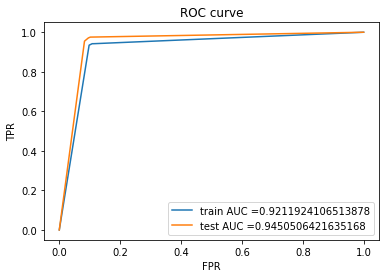

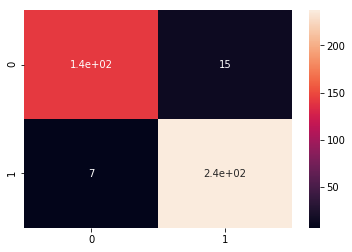

In [17]:
DT=DecisionTreeClassifier(max_depth=14)
Final_Random_state=accur_at_rstate(DT,x,y)
from sklearn.model_selection import cross_val_score
print('Cross_val_score ',cross_val_score(DT,x,y,cv=5 ,scoring='accuracy').mean())
roc_curve(DT,Final_Random_state)

# Performing KNeighborsClassifier 

In [32]:
neighbour={'n_neighbors':range(1,30)}
Knn=KNeighborsClassifier()
gs=GridSearchCV(Knn,neighbour,cv=10)
gs.fit(x,y)
gs.best_params_

{'n_neighbors': 21}

After applying the KNeighborsClassifier using grid seach we can find the n_neighbors: 21 , using this parameter to find the accuracy of KNeighborsClassifier 

The maximum accuracy reached is 0.800498753117207 at random state 89
Cross_val_score  0.76686097265636


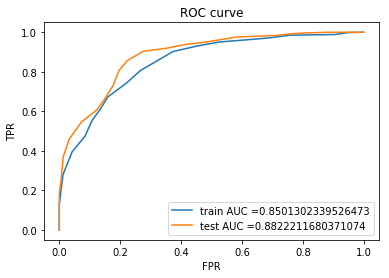

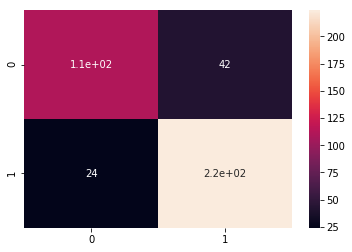

In [33]:
Knn=KNeighborsClassifier(n_neighbors=21)
Final_Random_state=accur_at_rstate(Knn,x,y)
print('Cross_val_score ',cross_val_score(Knn,x,y,cv=5 ,scoring='accuracy').mean())
roc_curve(Knn,Final_Random_state)

# Performing Support Vector classifier 

In [34]:
gamma={'gamma':range(1,30),'kernel':['Poly','rbf']}
svc=SVC()
gs=GridSearchCV(svc,gamma,cv=10)
gs.fit(x,y)
gs.best_params_

{'gamma': 1, 'kernel': 'rbf'}

After applying the SVC using grid seach we can find the 'gamma': 1, 'kernel': 'rbf', using this parameter to find the accuracy of SVC 

In [36]:
svc=SVC(gamma=1,kernel='rbf')
Final_Random_state=accur_at_rstate(svc,x,y)
print('Cross_val_score ',cross_val_score(svc,x,y,cv=5 ,scoring='accuracy').mean())


The maximum accuracy reached is 0.8204488778054863 at random state 71
Cross_val_score  0.782616653994537


# Performing Naiye bayes 

In [37]:
#as we are on working classification data set , BernoulliNB will be used for modelling
from sklearn.naive_bayes import BernoulliNB
alpha={'alpha':range(1,30)}
NB=BernoulliNB()
gs=GridSearchCV(NB,alpha,cv=10)
gs.fit(x,y)
gs.best_params_

{'alpha': 21}

After applying the Naiye bayes using grid seach we can find the 'alpha': 21, using this parameter to find the accuracy of Naiye bayes 

The maximum accuracy reached is 0.7531172069825436 at random state 67
Cross_val_score  0.6889020303567908


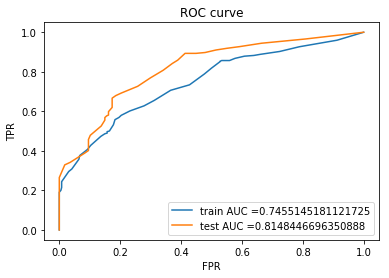

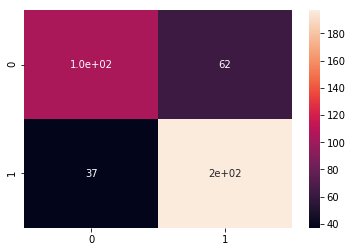

In [38]:
NB=BernoulliNB(alpha=21)
Final_Random_state=accur_at_rstate(NB,x,y)
print('Cross_val_score ',cross_val_score(NB,x,y,cv=5 ,scoring='accuracy').mean())
roc_curve(NB,Final_Random_state)

# Performing the logistic Regression

In [39]:
C={'C':range(1,30)}
log=LogisticRegression()
gs=GridSearchCV(log,C,cv=10)
gs.fit(x,y)
gs.best_params_

{'C': 1}

After applying the LogisticRegression using grid seach we can find the 'C': 1, using this parameter to find the accuracy of LogisticRegression 

The maximum accuracy reached is 0.7855361596009975 at random state 72
Cross_val_score  0.7593675199234041


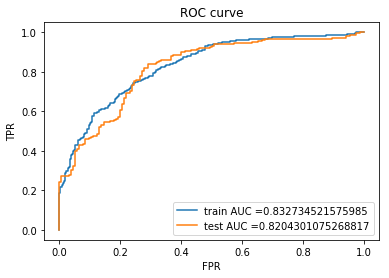

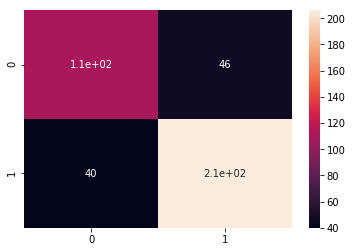

In [40]:
log=LogisticRegression(C=1)
Final_Random_state=accur_at_rstate(log,x,y)
print('Cross_val_score ',cross_val_score(log,x,y,cv=5 ,scoring='accuracy').mean())
roc_curve(log,Final_Random_state)

# RandomForestClassifier

In [41]:
from sklearn.ensemble import RandomForestClassifier
parameters={'n_estimators':range(1,30),'max_depth':range(1,30)}
RF=RandomForestClassifier()
gs=GridSearchCV(RF,parameters,cv=10)
gs.fit(x,y)
gs.best_params_

{'max_depth': 20, 'n_estimators': 27}

The maximum accuracy reached is 0.8503740648379052 at random state 52
Cross_val_score  0.8193292219312326


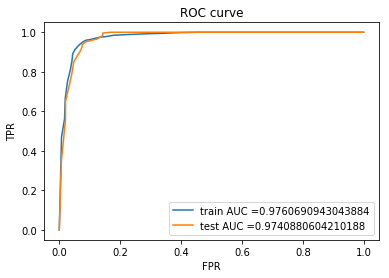

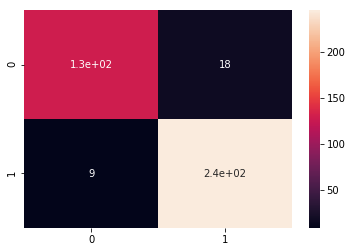

In [42]:
RF=RandomForestClassifier(n_estimators=27,max_depth=20)
Final_Random_state=accur_at_rstate(RF,x,y)
print('Cross_val_score ',cross_val_score(RF,x,y,cv=5 ,scoring='accuracy').mean())
roc_curve(RF,Final_Random_state)

# Performing Bagging for better accuracy

In [43]:
from sklearn.ensemble import BaggingClassifier
parameters={'n_estimators':range(1,30),'base_estimator':[log,NB,svc,Knn,DT]}
RF=BaggingClassifier()
gs=GridSearchCV(RF,parameters,cv=10)
gs.fit(x,y)
gs.best_params_

{'base_estimator': DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                        max_depth=14, max_features=None, max_leaf_nodes=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, presort='deprecated',
                        random_state=None, splitter='best'),
 'n_estimators': 28}

The maximum accuracy reached is 0.8778054862842892 at random state 92
Cross_val_score  0.8350820872405732


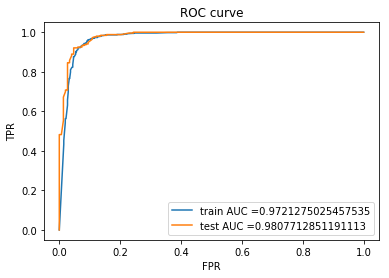

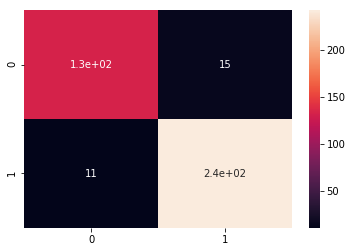

In [52]:
BG=BaggingClassifier(n_estimators=28,base_estimator=DT)
Final_Random_state=accur_at_rstate(BG,x,y)
print('Cross_val_score ',cross_val_score(BG,x,y,cv=5 ,scoring='accuracy').mean())
roc_curve(BG,Final_Random_state)

After performing several classification models on this data set and after analysing the performance matrix for all the models , it is concluded that BaggingClassifier is giving the best results which are as follows :

The maximum accuracy reached is 0.8778054862842892 at random state 92
Cross_val_score  0.8350820872405732

Therefore BaggingClassifier is selected as our final model

# Final Model

From all the classification models performed above , it can be concluded that tha accuracy for Bagging is maxm ,
therefore bagging will be selected as final model.

Accuracy 0.8653366583541147
--------------------------------------
Confusion matrix with Auc score


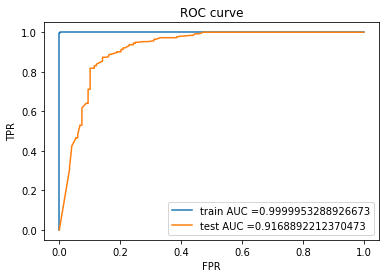

-----------------Confusion Matrix---------------------


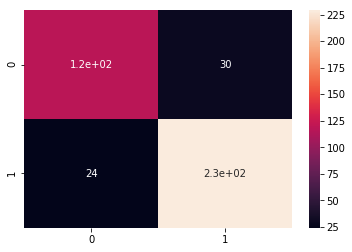

In [18]:
from sklearn.ensemble import BaggingClassifier
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.3,random_state=92)
BG=BaggingClassifier(n_estimators=28,base_estimator=DT)
BG.fit(train_x,train_y)
pred = BG.predict(test_x)
print('Accuracy',accuracy_score(test_y,pred))
print('--------------------------------------')
print('Confusion matrix with Auc score')
roc_curve(BG,92)
print('-----------------Confusion Matrix---------------------')


In [60]:
print('classification Report \n',classification_report(test_y,pred))

classification Report 
               precision    recall  f1-score   support

           0       0.83      0.80      0.82       148
           1       0.89      0.90      0.89       253

    accuracy                           0.87       401
   macro avg       0.86      0.85      0.85       401
weighted avg       0.86      0.87      0.86       401



In [19]:
print('mean cross_val_score',cross_val_score(BG,x,y,cv=5,scoring='accuracy').mean())
print('std deviation of cross_val_score',cross_val_score(BG,x,y,cv=5,scoring='accuracy').std())

mean cross_val_score 0.8418236602742812
std deviation of cross_val_score 0.026132871407206472


# Saving the Model

In [61]:
from sklearn.externals import joblib
joblib.dump(BG,"Bag_insurance.pkl")

['Bag_insurance.pkl']

# Conclusion:-

This data is about the sbi insurace claim status , which is decided by various features like age sex bmi children smoker	region charges.Since the class of the model is binary it becomes a classification driven problem.

In this project we have performed Null value analysis ,Univariate analysis ,Bivariate analysis and several EDA techniques.

We have also treated the outliers using zscore < 3.

Several classification algorithms have been performed and by looking into performance matrix BaggingClassifier is selected as final model which is best performing with this dataset.

At last we have saved the model